# Part I - Ford GoBike Tripdata
## by Antonio Perez

## Ford GoBike Program
## Data Analysis

## Introduction
This datast contains 183,412 records of bike trips on the San Francisco city in California.  
  Was launched on August 2013 and has 4618 bikes in 329 stations. It contains information of just 1 month, which is   February 2019.  The pricing information is not in the dataset but was pulled from wikipedia, this can give context to understand better the data.  
  
  **Fares:**  
  Single rides start at 3 usd.  
  Day passes are:       10 usd.  
  Month membership is:   25 usd.  
  Year membership is:  159 usd.  
  
**Times:**  
  Single ride or day pass 30 min  (1800 seconds)  
  Full price members      45 min. (2700 seconds)  
  Each additional 15 min cost 3 usd extra (2 usd for members).

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from markupsafe import escape
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv('fordgobike-tripdata.csv', parse_dates=True)

In [3]:
# Look for missing values, columns, data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [4]:
# Look at a data sample to see its structure and contents
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
# Look at the values and see if there is innacurate/wrong data
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


No negative durations. The max duration is slightly less that 24 hours, makes sense for someone with a day pass.  
Birth year has a minimum of 1878, for sure a mistake.

# Assesment

## Quality issues

100. There is missing information on station ids.  
110. `member_birth_year` contains numbers of people bon in 1800s, the oldest living person was born in 1903.


## Tidyness issues
200 start time and end times are strings representing dates.  
210 `bike_id` should be categorical and not quantitative.  
220 `member_birth_year` should be int64 type.  
230 `start_station_id` and `end_station_id` should be categorical and not quantitative.  
240 There are 6 columns that should be on another table for stations alone:  
     <p><center>`start_station_name`, `start_station_latitude`, `start_station_longitude`,  
    `end_station_name`,   `end_station_latitude`,   `end_station_longitude`.</center></p>  

# Cleaning

## Quality issues

100. Remove form dataframe records with no `start_station_id`.
110. Replace birth years of members born before 1903.


## Tidyness issues
200 Convert `start_time` & `end_time` columns to datetime64[ns].   
210 `bike_id` should be categorical and not quantitative.  
220 `member_birth_year` should be int64 type.  
230 `start_station_id` and `end_station_id` should be categorical and not quantitative.  
240 There are 6 columns that should be on another table for stations alone:  
     <p><center>`start_station_name`, `start_station_latitude`, `start_station_longitude`,  
    `end_station_name`,   `end_station_latitude`,   `end_station_longitude`.</center></p>


In [6]:
# Make a copy of the original dataframe to another one on which changes ae going to be made
df_clean = df.copy()

### Quality issue 100

**Define**  
There are incomplete records rempresenting 0.1% of the data and are not relevant.
Remove records without `start_station_id`.

In [7]:
print('Number of total records is                          {}'.format(df_clean.shape[0]))
print('Number of records with empty "start_station_id" is: {}'.format(df_clean[df_clean.start_station_id.isna()].shape[0]))

Number of total records is                          183412
Number of records with empty "start_station_id" is: 197


**Code**

In [8]:
# filter records.
df_clean = df_clean[~df_clean.start_station_id.isna()]

**Test**

In [9]:
print('Number of total records is                          {}'.format(df_clean.shape[0]))
print('Number of records with empty "start_station_id" is: {}'.format(df_clean[df_clean.start_station_id.isna()].shape[0]))

Number of total records is                          183215
Number of records with empty "start_station_id" is: 0


### Quality issue 110

**Define**  
Replace birth years of 1903 and below with 0.

In [10]:
df_clean[df_clean.member_birth_year < 1903].shape[0]

71

**Code**

In [11]:
df_clean = df_clean[df_clean.member_birth_year >= 1903]

**Test**

In [12]:
df_clean[df_clean.member_birth_year < 1903].shape[0]

0

### Tidyness issue 200

**Define**  
`start_time` and `end_time` columns are strings, convert to DateTime.

In [13]:
print('"start_time" column type: {}'.format(df_clean.start_time.dtype))
print('"end_time"   column type  {}'.format(df_clean.end_time.dtype))

"start_time" column type: object
"end_time"   column type  object


**Code**

In [14]:
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

**Test**

In [15]:
print('"start_time" column type: {}'.format(df_clean.start_time.dtype))
print('"end_time"   column type  {}'.format(df_clean.end_time.dtype))

"start_time" column type: datetime64[ns]
"end_time"   column type  datetime64[ns]


In [16]:
df_clean.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No


### Tydiness issue 210

**Define**  
`bike_id` is a number but should not be treated like a number (cannot be summed for example). Convert it to categorical.

In [17]:
print('"bike_id" column type: {}'.format(df_clean.bike_id.dtype))

"bike_id" column type: int64


In [18]:
df_clean.bike_id.sum()

783913534

**Code**

In [19]:
df_clean.bike_id = pd.Categorical(df_clean.bike_id)

**Test**

In [20]:
print('"bike_id" column type: {}'.format(df_clean.bike_id.dtype))

"bike_id" column type: category


### Tydiness issue 220

**Define**  
'member_birth_year' is of type float, change it to integer.

In [21]:
print('"member_birth_year" column type: {}'.format(df_clean.member_birth_year.dtype))

"member_birth_year" column type: float64


In [22]:
df_clean.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No


**Code**

In [23]:
df_clean.member_birth_year.fillna(0, inplace=True)
df_clean.member_birth_year = df_clean.member_birth_year.astype(np.int64)

**Test**

In [24]:
print('"member_birth_year" column type: {}'.format(df_clean.member_birth_year.dtype))

"member_birth_year" column type: int64


In [25]:
df_clean.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No


### Tydiness issue 230

**Define**  
Change `start_station_id` & `end_station_id` to integer and then categorical.

In [26]:
print('"start_station_id" column type: {}'.format(df_clean.start_station_id.dtype))
print('"end_station_id" column type:   {}'.format(df_clean.end_station_id.dtype))

"start_station_id" column type: float64
"end_station_id" column type:   float64


In [27]:
df_clean.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No


**Code**

In [28]:
df_clean.start_station_id = df_clean.start_station_id.astype(np.int64)
df_clean.end_station_id = df_clean.end_station_id.astype(np.int64)

In [29]:
df_clean.start_station_id = pd.Categorical(df_clean.start_station_id)
df_clean.end_station_id = pd.Categorical(df_clean.end_station_id)

**Test**

In [30]:
print('"start_station_id" column type: {}'.format(df_clean.start_station_id.dtype))
print('"end_station_id" column type:   {}'.format(df_clean.end_station_id.dtype))

"start_station_id" column type: category
"end_station_id" column type:   category


In [31]:
df_clean.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No


### Tydiness issue 240

**Define**  
The dataframe contains information types that should be separated, first a dataframjust for the stations should be created and contain the columns: `station_id`, `name`, `latitude`, `longitude`.  
Start and end stations share the names and IDs, and there are no extra stations in one set that the other does not contain (the unique value are the same).  
After that drop this columns from the df_clean dataframe: 
- `start_station_name`
- `start_station_latitude`
- `start_station_longitude`
- `end_station_name`
- `end_station_latitude`
- `end_station_longitude`

In [32]:
df_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

**Code**

In [33]:
df_stations = df_clean.copy()
column_names = {'start_station_id': 'id',
                'start_station_name': 'name', 
                'start_station_latitude': 'latitude',
                'start_station_longitude': 'longitude'}
df_stations = df_stations[['start_station_id','start_station_name','start_station_latitude','start_station_longitude']].copy()
df_stations.rename(columns=column_names, inplace=True)
df_stations.drop_duplicates(inplace=True)

In [34]:
col_list = ['start_station_name', 'start_station_latitude', 'start_station_longitude',
            'end_station_name', 'end_station_latitude', 'end_station_longitude']
df_clean.drop(col_list,axis=1, inplace=True)

**Test**

In [35]:
df_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'end_station_id', 'bike_id', 'user_type', 'member_birth_year',
       'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [36]:
df_stations.head()

,id,name,latitude,longitude
0,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811
2,86,Market St at Dolores St,37.769305,-122.426826
3,375,Grove St at Masonic Ave,37.774836,-122.446546
4,7,Frank H Ogawa Plaza,37.804562,-122.271738
5,93,4th St at Mission Bay Blvd S,37.770407,-122.391198


# Store

In [37]:
df_clean.to_csv('fordgobike-tripdata-clean.csv')
df_stations.to_csv('fordgobike-stations.csv')

### Structure of your dataset

The dataset after cleaning has 2 tables or dataframes.  

<table style="border:1px solid black">
<tr>
    <th style="text-align:left">Column Name</th>
    <th style="text-align:left">Description</th>
</tr>
<tr>
    <td style="text-align:left"><b>duration_sec</b></td>
    <td style="text-align:left">Bike ride duration in seconds.</td>
</tr>
<tr>
    <td style="text-align:left"><b>start_time</b></td>
    <td style="text-align:left">Time at the ride started.</td>
</tr>
<tr>
    <td style="text-align:left"><b>end_time</b></td>
    <td style="text-align:left">Time at the ride ended.</td>
</tr>
<tr>
    <td style="text-align:left"><b>start_station_id</b></td>
    <td style="text-align:left">Id of the station where the ride started.</td>
</tr>
<tr>
    <td style="text-align:left"><b>end_station_id</b></td>
    <td style="text-align:left">Id of the station where the ride ended.</td>
</tr>
<tr>
    <td style="text-align:left"><b>bike_id</b></td>
    <td style="text-align:left">Id of the bike used for the trip.</td>
</tr>
<tr>
    <td style="text-align:left"><b>user_type</b></td>
    <td style="text-align:left">Can be Customer or subscriber</td>
</tr>
<tr>
    <td style="text-align:left"><b>member_birth_year</b></td>
    <td style="text-align:left">Id of the station where the ride ended.</td>
</tr>
<tr>
    <td style="text-align:left"><b>member_gender</b></td>
    <td style="text-align:left">Can be Male, Female or Other, also can be blank.</td>
</tr>
<tr>
    <td style="text-align:left"><b>bike_share_for_all_trip</b></td>
    <td style="text-align:left">Id of the station where the ride ended .</td>
</tr>
</table>

<table style="border:1px solid black">
    <tr>
        <th style="text-align:left">Column name</th>
        <th style="text-align:left">Description</th>
    </tr>
    <tr>
        <td style="text-align:left">id</td>
        <td style="text-align:left">Integer representing a station.</td>
    </tr>
    <tr>
        <td style="text-align:left">name</td>
        <td style="text-align:left">Name of the station, street and number or streets crossing.</td>
    </tr>
    <tr>
        <td style="text-align:left">latitude</td>
        <td style="text-align:left">Float representing latitude coordinate of the station.</td>
    </tr>
    <tr>
        <td style="text-align:left">longitude</td>
        <td style="text-align:left">Float representing longitude coordinate of the station.</td>
    </tr>
    
</table>

### Main features of interest in the dataset

1. Who uses the service more.  
2. When are rides more active.  
3. Where do the bikes go more often.  
4. How much time do the rides last.  

### What features in the dataset will help support the investigation into the feature(s) of interest?

Duration, birth years, station location, gender.

## Univariate Exploration

### Questions about tIme.
1. How is the ride time distributed?
2. Do users stick to the normal ride time or they pay extra?

### Visualization

In [38]:
print('Rides with more than 3000 second duration: {}'.format(df_clean[df_clean.duration_sec > 3000].count()[0]))
print('Rides with less than 3000 second duration: {}'.format(df_clean[df_clean.duration_sec <= 3000].count()[0]))

Rides with more than 3000 second duration: 1924
Rides with less than 3000 second duration: 172957


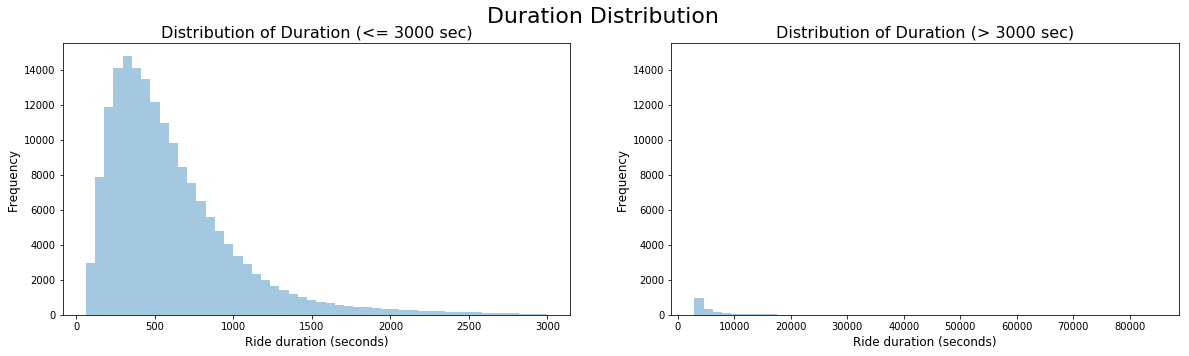

In [39]:
# Ride duration distibution
# Since there are some outliers on the uper side decided to make 2 graphs to have a clear view of the 98+%
# of the rides

# Distribution of rides with less or equal than 3000sec duration
fig = plt.figure(figsize = [20, 5])
fig.suptitle('Duration Distribution', fontsize=22)
plt.subplot(1, 2, 1)
g1 = sb.distplot(df_clean[df_clean.duration_sec <= 3000].duration_sec, kde=False);
g1.set_title("Distribution of Duration (<= 3000 sec)", fontsize=16)
g1.set_ylabel('Frequency', fontsize=12)
g1.set_xlabel('Ride duration (seconds)', fontsize=12)
y_min, y_max = g1.get_ylim();

# Distribution of rides with less or equal than 3000sec duration
g2 = plt.subplot(1, 2, 2)
sb.distplot(df_clean[df_clean.duration_sec > 3000].duration_sec, kde=False);
g2.set_title("Distribution of Duration (> 3000 sec)", fontsize=16)
g2.set_ylabel('Frequency', fontsize=12)
g2.set_xlabel('Ride duration (seconds)', fontsize=12)
g2.set_ylim(y_min, y_max);

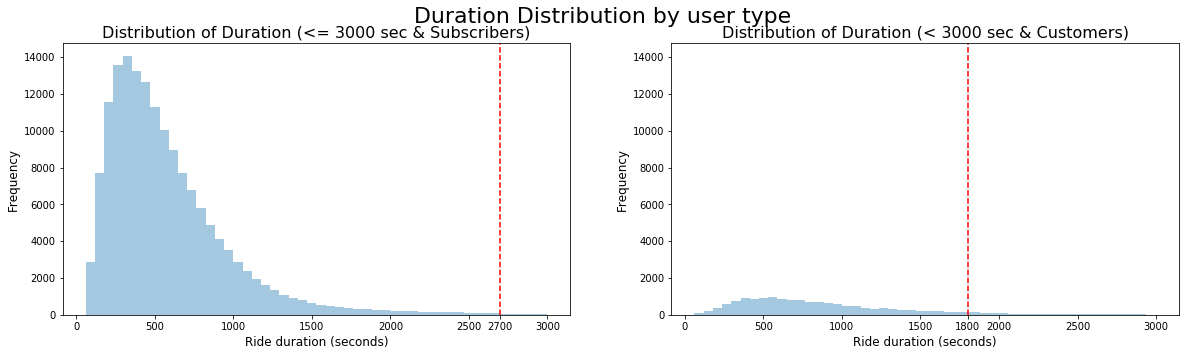

In [40]:
# Users sticking to one standard ride duration behavior.

# Distribution of rides with less or equal than 3000sec duration
fig = plt.figure(figsize = [20, 5])
fig.suptitle('Duration Distribution by user type', fontsize=22)
plt.subplot(1, 2, 1)
subSet1 = df_clean[(df_clean.duration_sec <= 3000) & (df_clean.user_type == 'Subscriber')].duration_sec
g1 = sb.distplot(subSet1, kde=False);
g1.set_title("Distribution of Duration (<= 3000 sec & Subscribers)", fontsize=16)
g1.set_ylabel('Frequency', fontsize=12)
g1.set_xlabel('Ride duration (seconds)', fontsize=12)
g1.axvline(x=2700, color='r', linestyle='--')
# g1.annotate('2700', xy=(2700, 8000), xytext=(2800, 8000), arrowprops=dict(arrowstyle='->', color='black'))
y_min, y_max = g1.get_ylim();
g1xtick_list = g1.get_xticks().tolist()
g1xtick_list.append(2700)
g1xtick_list.sort()
g1.set_xticks(g1xtick_list[1:-1])

# Distribution of rides with less or equal than 3000sec duration
g2 = plt.subplot(1, 2, 2)
subSet2 = subSet1 = df_clean[(df_clean.duration_sec <= 3000) & (df_clean.user_type == 'Customer')].duration_sec
sb.distplot(subSet2, kde=False);
g2.set_title("Distribution of Duration (< 3000 sec & Customers)", fontsize=16)
g2.set_ylabel('Frequency', fontsize=12)
g2.set_xlabel('Ride duration (seconds)', fontsize=12)
g2.axvline(x=1800, color='r', linestyle='--')
g2.set_ylim(y_min, y_max);
g2xtick_list = g2.get_xticks().tolist()
g2xtick_list.append(1800)
g2xtick_list.sort()
g2.set_xticks(g2xtick_list[1:-1]);

In [41]:
# Proportion of subscribers not exceeding the rent time
subs_ride_below_2700 = df_clean[(df_clean.user_type == 'Subscriber') & (df_clean.duration_sec < 2700)].shape[0] /\
                                 df_clean[df_clean.user_type == 'Subscriber'].shape[0]
cust_ride_below_1800 = df_clean[(df_clean.user_type == 'Customer') & (df_clean.duration_sec < 1800)].shape[0] /\
                                 df_clean[df_clean.user_type == 'Customer'].shape[0]
subscribers_rides_below_2700 = df_clean[(df_clean.user_type == 'Subscriber') & (df_clean.duration_sec < 2700)]
customers_rides_below_1800 = df_clean[(df_clean.user_type == 'Customer') & (df_clean.duration_sec < 1800)]

print('Proportion of subscribers below 2700 seconds:{}'.format(subs_ride_below_2700))
print('Proportion of customers   below 1800 seconds:{}'.format(cust_ride_below_1800))
print('Mean ride for subscribers below 2700 seconds:{}'.format(subscribers_rides_below_2700.duration_sec.mean()))
print('Mean ride for customers   below 1800 seconds:{}'.format(customers_rides_below_1800.duration_sec.mean()))

Proportion of subscribers below 2700 seconds:0.991700353713997
Proportion of customers   below 1800 seconds:0.8831592295151259
Mean ride for subscribers below 2700 seconds:580.1739806122059
Mean ride for customers   below 1800 seconds:776.4394229454397


### Answer
1. We can see that the ride duration time is highly skewed to the right.
2. We can see on the charts that for subscribers they almost never exceed the time, less than 1%.
And for Customers group sligthly more than 11%, this and the volume of rides suggest that this group are visitors / tourists, not regular users.  
3. Rides last on average 9.6min for 99% of Subscribers and 13min for 88% of Customers.

### Question
How are **birth years** distributed?

### Visualization

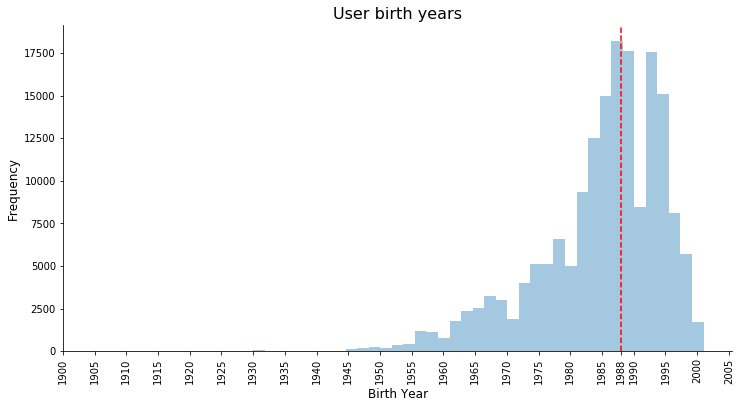

In [42]:
subSet1 = df_clean.member_birth_year
plt.figure(figsize=(12, 6))
g1 = sb.distplot(subSet1, kde=False);
g1.set_title("User birth years", fontsize=16);
g1.set_ylabel('Frequency', fontsize=12);
g1.set_xlabel('Birth Year', fontsize=12);
birth_year_mode = subSet1.mode()[0];
x_ticks = np.arange(1900,2005+5,5)
x_ticks = np.append(x_ticks,birth_year_mode)
x_ticks = np.sort(x_ticks)
g1.set_xticks(x_ticks)
g1.set_xticklabels(x_ticks, rotation=90)
g1.get_xticks()
g1.axvline(x=birth_year_mode, color='r', linestyle='--');
g1.spines['right'].set_visible(False)
g1.spines['top'].set_visible(False)

### Answer
It can be seen a bimodal distribution with most users close to 1988 birth year.

### Question
What is the gender that uses the service the most?

### Visualization

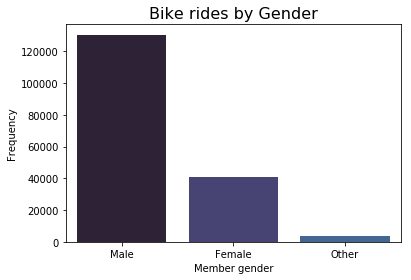

In [43]:
g1 = sb.countplot(df_clean.member_gender, palette=sb.color_palette('mako'), order=['Male','Female', 'Other']);
g1.set_xlabel('Member gender');
g1.set_ylabel('Frequency');
g1.set_title('Bike rides by Gender', fontsize=16);


### Answer
Males are th main users of the service.

### Question
What locations are the most used?

### Visualization

In [44]:
location_count_df = df_clean[['start_station_id','end_station_id']].copy()
temp_df1 = location_count_df.groupby('start_station_id').count().reset_index()
temp_df2 = location_count_df.groupby('end_station_id').count().reset_index()
temp_df1.rename(columns={"start_station_id": 'id'}, inplace=True)
temp_df2.rename(columns={"end_station_id": 'id'}, inplace=True)
merged_df = temp_df1.merge(temp_df2)
merged_df['total_count'] = merged_df.end_station_id + merged_df.start_station_id
merged_df.sort_values('total_count', ascending=False, inplace=True)

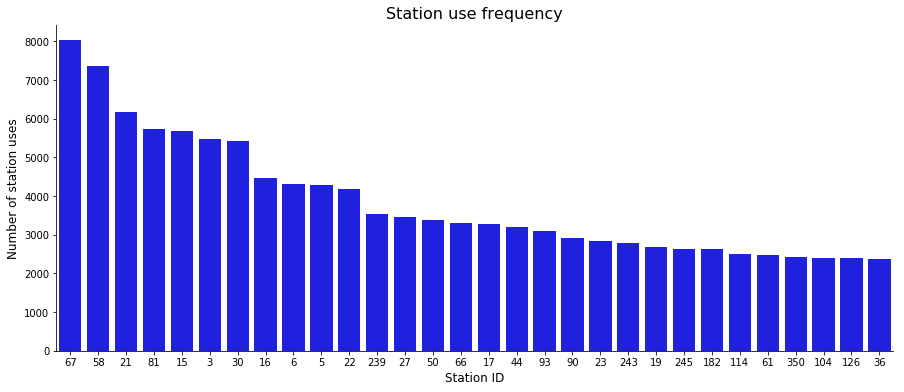

In [45]:
plt.figure(figsize=(15, 6))
subSet = merged_df[0:30]
g1 = sb.barplot(subSet.id, subSet.total_count, order=subSet.sort_values('total_count', ascending=False).id, 
                color='blue');
g1.set_xlabel('Station ID', fontsize=12);
g1.set_ylabel('Number of station uses', fontsize=12);
g1.set_title('Station use frequency', fontsize=16);
g1.spines['right'].set_visible(False)
g1.spines['top'].set_visible(False)

In [46]:
df_stations[df_stations.id == 67]

,id,name,latitude,longitude
85,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526


### Answer
We can see the most used station is 67. Located at San Francisco Caltrain Station 2.

### Distribution(s) of the variable(s) of interest.

Data has an nimodal distribution skewed to the right, there are afew outliers on the high side but represent about 2% of the total dataset.  
No transformations used.

### Operations on the data to tidy, adjust, or change the form of the data.

The data was reestructured, the station info was separated from the ride info to complply with each **type** of observational unit is a table. Data types were changed, start and end times change to datetime, birth year changed to integer and some other changes stated on the assesment.

## Bivariate Exploration

### Question
Among the users who uses the service de most? male, females?.

### Visualization

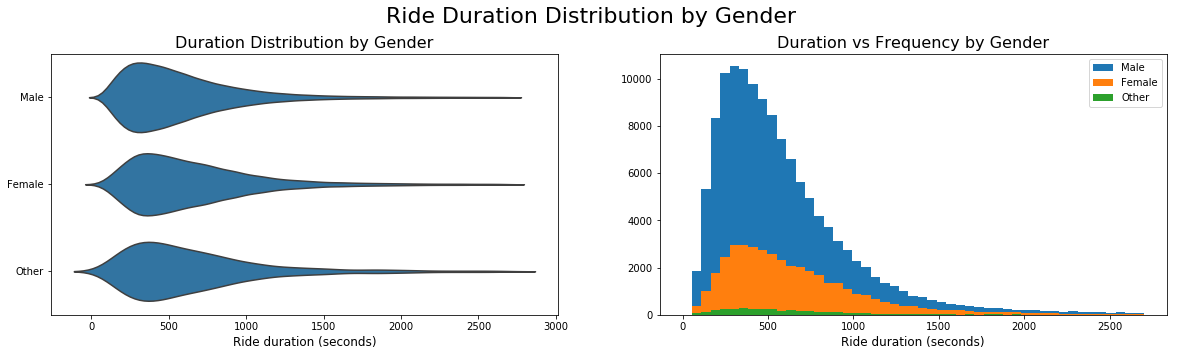

In [47]:
subSet = df_clean[df_clean.duration_sec < 2700]

fig = plt.figure(figsize = [20, 5])
fig.suptitle('Ride Duration Distribution by Gender', fontsize=22)
plt.subplot(1, 2, 1)
sb.violinplot(data=subSet, y='member_gender', x='duration_sec', color=sb.color_palette()[0], inner=None);
plt.title('Duration Distribution by Gender', fontsize=16);
plt.ylabel('')
plt.xlabel('Ride duration (seconds)', fontsize=12)

plt.subplot(1, 2, 2)
bins = np.linspace(0,2700,50)
plt.hist(subSet[subSet.member_gender == 'Male'].duration_sec, bins=bins, label='Male');
plt.hist(subSet[subSet.member_gender == 'Female'].duration_sec, bins=bins, label='Male');
plt.hist(subSet[subSet.member_gender == 'Other'].duration_sec, bins=bins, label='Male');
plt.legend(subSet.member_gender.unique());
plt.xlabel('Ride duration (seconds)', fontsize=12)
plt.title('Duration vs Frequency by Gender', fontsize=16);
plt.subplots_adjust(top=0.85);

### Answer
We can see the beahvior or type of usage is about the same looking at the violin plot, but on the histogram we can see that **the vast majority of users is male**.

### How did the feature(s) of interest vary with other features in the dataset?

I can see that the most active users are male, and that the usage pattern is similar among genders.

## Multivariate Exploration

### Questions
How do ages are related to BikeGo usage?

### Visualization

In [48]:
# Define a function to calculate age of the user
def get_age(x):
    """
    Function to calculate the age of the user based on the birth year
    Input  x - integer   Birthyear of the user
    Output age - integer Age calculated from 2019 year
    """
    age = 2019 - x
    return age

In [49]:
df_clean['age'] = df_clean.member_birth_year
df_clean['age'] = df_clean.age.apply(get_age)
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,13,4902,Customer,1984,Male,No,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,3,5905,Customer,1972,Male,No,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,70,6638,Subscriber,1989,Other,No,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,222,4898,Subscriber,1974,Male,Yes,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,323,5200,Subscriber,1959,Male,No,60


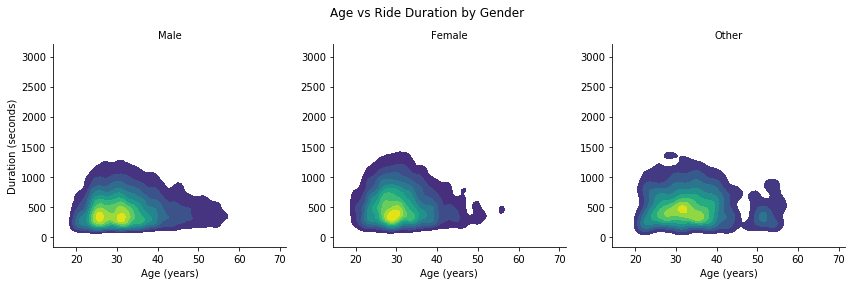

In [50]:
# Plot the Seaborn's FacetGrid
df_clean_subset = df_clean[(df_clean.duration_sec < 3000) & (df_clean.member_birth_year > 1950)]
g = sb.FacetGrid(data = df_clean_subset, size=4, col = 'member_gender');
g.map(sb.kdeplot, 'age', 'duration_sec', shade=True, cmap = 'viridis', shade_lowest = False);
g.set_ylabels('Duration (seconds)');
g.set_xlabels('Age (years)');
g.set_titles('{col_name}');
plt.subplots_adjust(top=0.85);
g.fig.suptitle('Age vs Ride Duration by Gender');

In [51]:
# Most repeating age for riders
print('Most common Male age:  {}'.format(df_clean_subset[df_clean_subset.member_gender == 'Male']['age'].mode()[0]))
print('Most common Female age:{}'.format(df_clean_subset[df_clean_subset.member_gender == 'Female']['age'].mode()[0]))
print('Most common Other age: {}'.format(df_clean_subset[df_clean_subset.member_gender == 'Other']['age'].mode()[0]))

Most common Male age:  31
Most common Female age:29
Most common Other age: 36


### Answer
Most of the users are around 30 years old at the time the data was sampled.
Also the data is concentrated below 25min ride duration.

### Question
What are the days with more rides?

### Visual

In [52]:
df_clean['dow'] = df_clean.start_time.dt.dayofweek
df_clean['day_name'] = df_clean.start_time.dt.day_name()


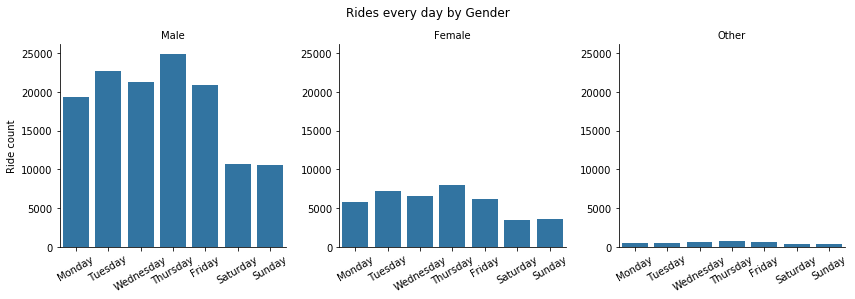

In [53]:
# Plot the Seaborn's FacetGrid
subSet = df_clean.groupby(['member_gender','dow','day_name']).count().reset_index()
g = sb.FacetGrid(data = subSet, size=4, col = 'member_gender', col_order=['Male','Female','Other']);
g.map(sb.barplot, 'dow', 'duration_sec');
g.set_ylabels('Ride count');
g.set_xlabels('')
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
g.set_xticklabels(weekdays, rotation=30)
g.set_titles('{col_name}');
plt.subplots_adjust(top=0.85);
g.fig.suptitle('Rides every day by Gender');

In [54]:
rides_on_wkdays = df_clean[df_clean.day_name.str.contains('Monday|Tuesday|Wednesday|Thursday|Friday')]
rides_on_wkends = df_clean[df_clean.day_name.str.contains('Saturday|Sunday')]

print_statements = {'Average rides on weekdays:': rides_on_wkdays.shape[0] / (5*4),
                    'Average rides on weekends:': rides_on_wkends.shape[0] / (2*4)}

for key, value in print_statements.items():
    print(key, value)

Average rides on weekdays: 7298.3
Average rides on weekends: 3614.375


### Answer
The number of rides is more elevated on weekdays.

### Question
Does the trip time changes over the week?

### Visual

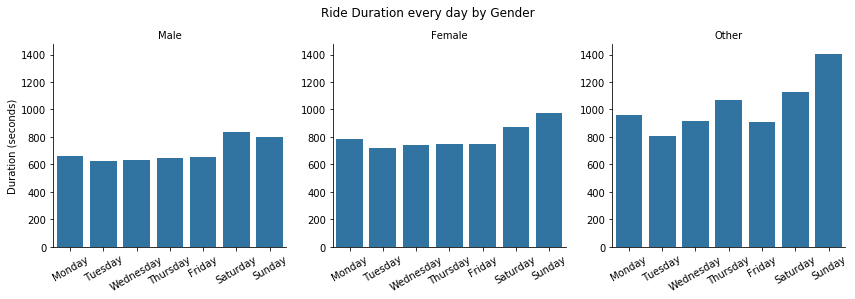

In [55]:
# Plot the Seaborn's FacetGrid
subSet = df_clean.groupby(['member_gender','dow','day_name']).mean().reset_index()
g = sb.FacetGrid(data = subSet, size=4, col = 'member_gender', col_order=['Male','Female','Other']);
g.map(sb.barplot, 'dow', 'duration_sec');
g.set_ylabels('Duration (seconds)');
g.set_xlabels('')
g.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], rotation=30)
g.set_titles('{col_name}');
plt.subplots_adjust(top=0.85);
g.fig.suptitle('Ride Duration every day by Gender');

### Answer
The trip duration on average lasts longer on weekends.

### Question
What are the peak hours when the bike service is being used?

### Visual

In [56]:
# Create column with hour containing the start date
df_clean['hour'] = df_clean.start_time.dt.hour

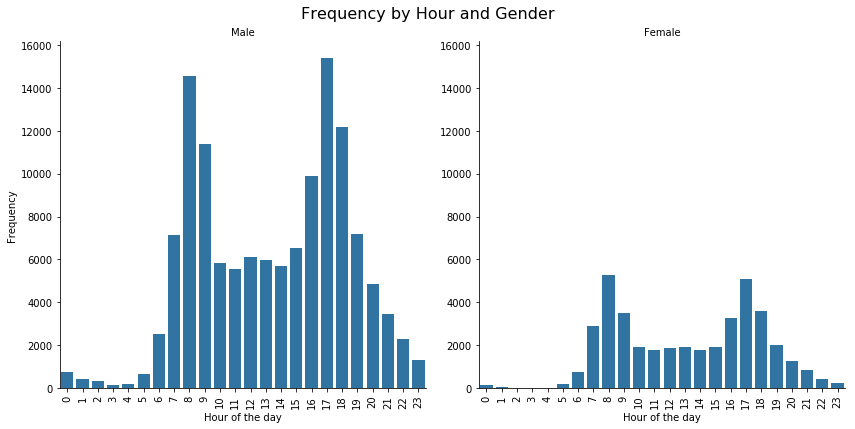

In [57]:
# Plot the Seaborn's FacetGrid
subSet = df_clean.groupby(['member_gender','hour']).count().reset_index();
g = sb.FacetGrid(data = subSet, size=6, col = 'member_gender', col_order=['Male','Female']);
g.map(sb.barplot, 'hour', 'duration_sec');
g.set_ylabels('Frequency');
g.set_xlabels('Hour of the day');
g.set_xticklabels(rotation=90);
g.set_titles('{col_name}');
plt.subplots_adjust(top=0.9);
g.fig.suptitle('Frequency by Hour and Gender', fontsize=16);

### Answer
There is a bimodal distribution, since this is a count and previously we saw that weekdays contain the highest count of rides this charts suggest that work start and end are the peak hours. (8am and 5pm).

### Features that strengthened each other in terms of looking at your feature(s) of interest.

The latest part suggests that this service is used mainly by young working men and for around 10 minutes. 

### Interesting or surprising interactions between features.

It surprised me that the ammount of men using this service is significantly higher that women.

## Conclusions
The Ford GoBike generating sales for 0.5M usd and helping the city to lower traffic, contamination, helping people save on gas, improving their health is something that other cities should be modeling.  
With 180k+ rides a month this is without a doubt a widely adopted system.  
For the analysis we can conclude that the users are mainly young men using the bikes for 10min trips on weekdays.